In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris=pd.read_csv('iris.csv')

In [4]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [5]:
iris=iris.drop('Id',axis=1)

In [6]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


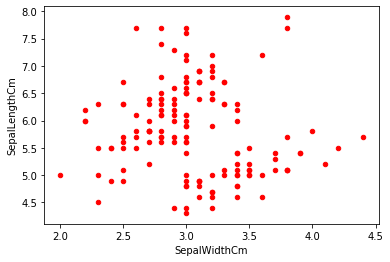

In [7]:
iris.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm',color='r')
plt.show()

C:\Users\Raghav Jha\Anaco\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


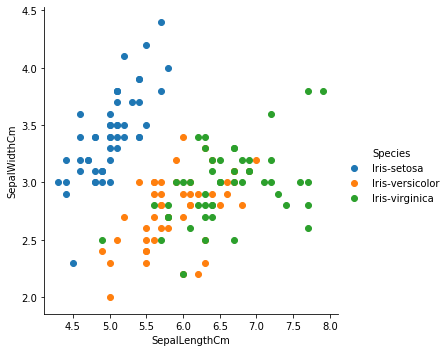

In [63]:
#sns.jointplot(data=iris,size=5,x='SepalLengthCm',y='SepalWidthCm')
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

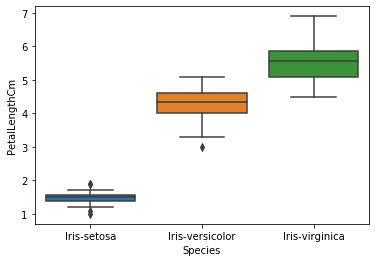

In [64]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)

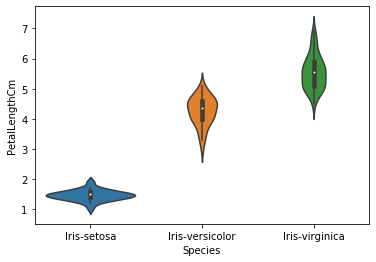

In [65]:
ax=sns.violinplot(x="Species", y="PetalLengthCm", data=iris)
#ax=sns.stripplot(x='Species',y='PetalLengthCm',data=iris,jitter=True)

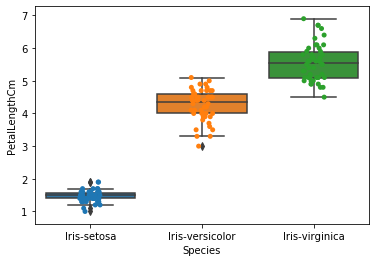

In [66]:
ax=sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
ax=sns.stripplot(x='Species',y='PetalLengthCm',data=iris,jitter=True,edgecolor='green')
#ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")


C:\Users\Raghav Jha\Anaco\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


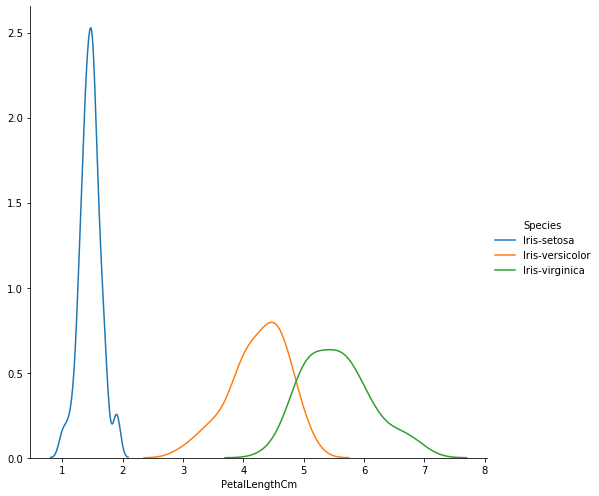

In [67]:
#sns plot for univariate realtiion
sns.FacetGrid(iris,hue='Species',size=7).map(sns.kdeplot,'PetalLengthCm').add_legend()

C:\Users\Raghav Jha\Anaco\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


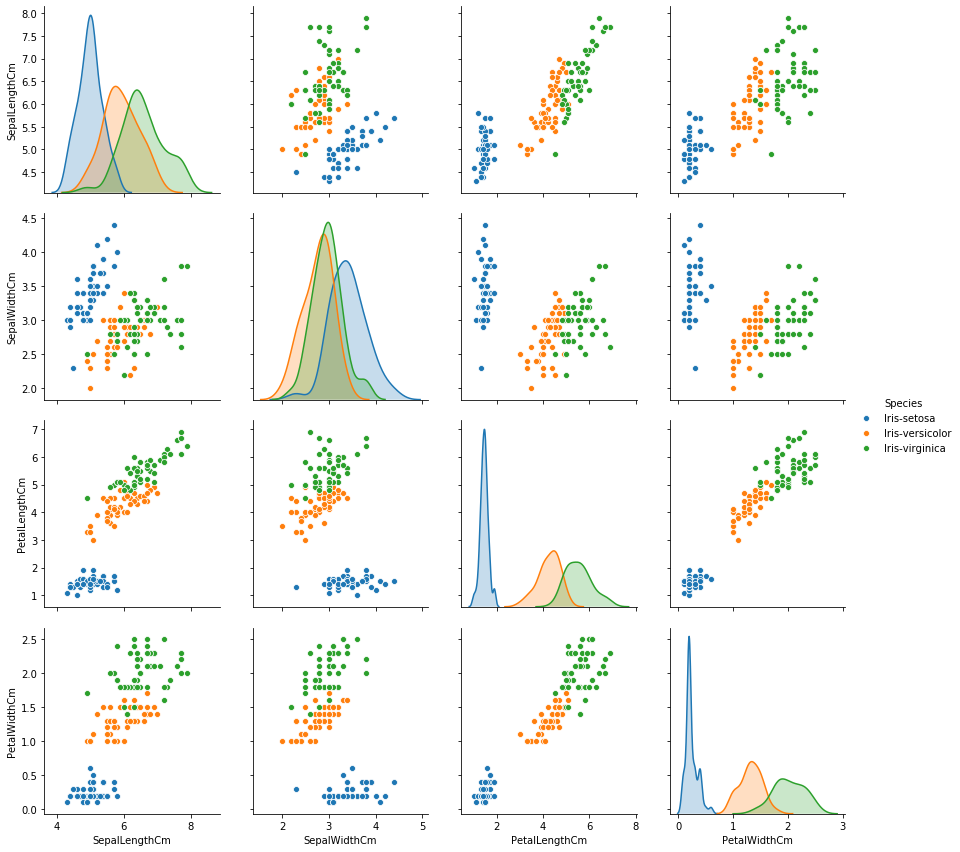

In [68]:
sns.pairplot(iris,hue='Species',size=3)

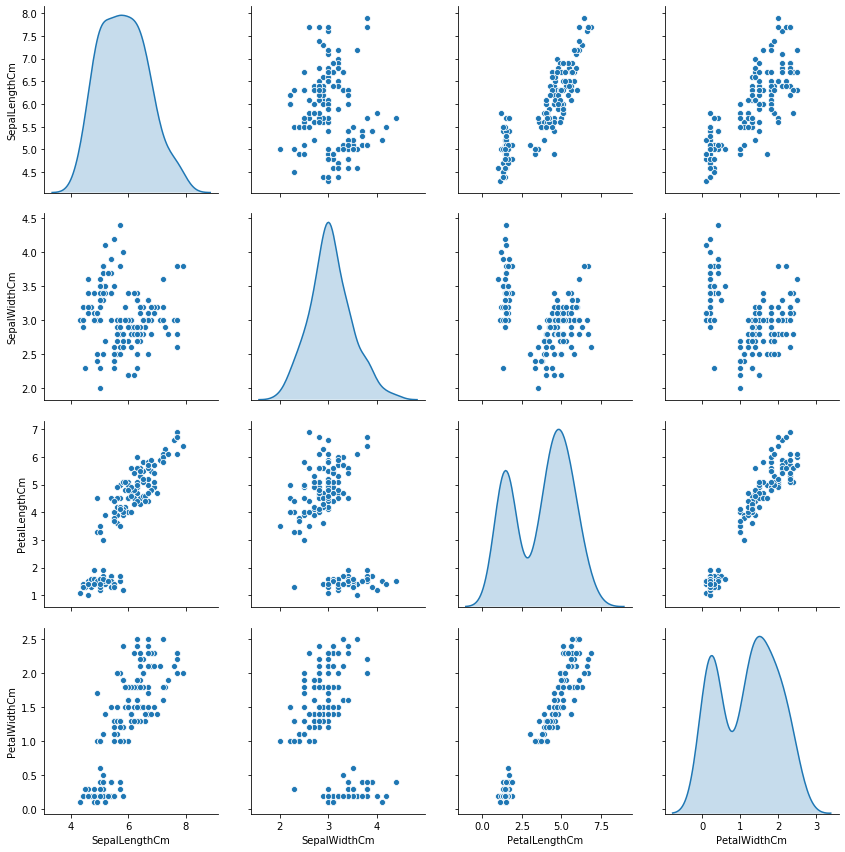

In [69]:
sns.pairplot(iris,size=3,diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x04A6E290>,
      dtype=object)

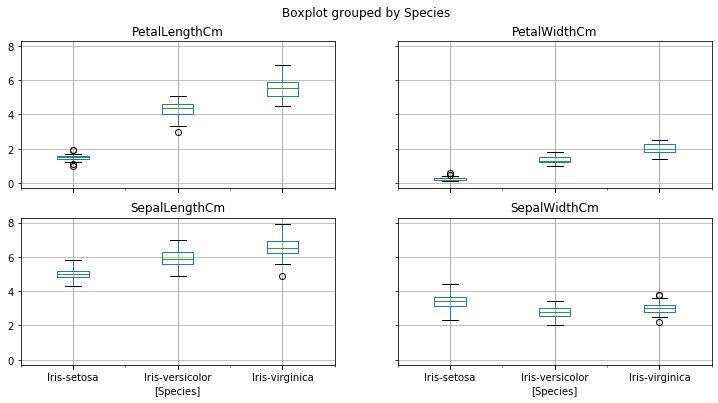

In [70]:
iris.boxplot(by='Species',figsize=(12,6))

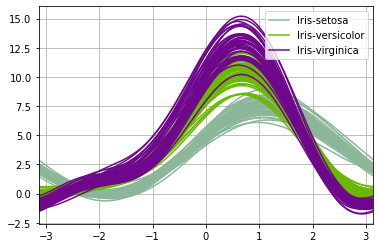

In [71]:
#andrew curve sample coefficet foureeir series
#from pandas.tools.plotting import andrews_curves
import pandas
#import pandas.tools.plotting
from pandas.plotting import andrews_curves
andrews_curves(iris,'Species')


In [72]:
pandas.__version__

'0.25.1'

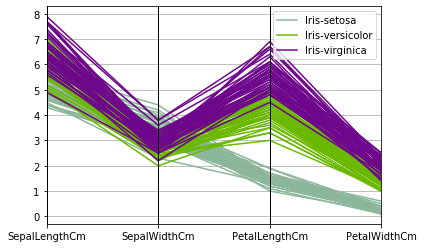

In [73]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris,'Species')


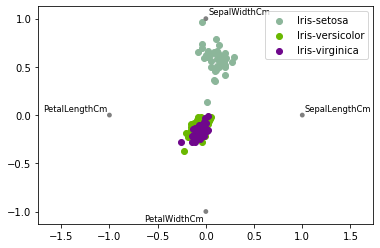

In [74]:
from pandas.plotting import radviz
radviz(iris,'Species')

In [75]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [76]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [77]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [79]:
#data into lbel
feature_columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm' ,'PetalWidthCm']
x=iris[feature_columns].values
y=iris['Species'].values
#print(y)
#x=iris.iloc[:,1:5].values
#y=iris.iloc[:,5].values

In [80]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
la=LabelEncoder()
y=la.fit_transform(y)

In [81]:
#from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#using knn classifier find the nearst neighbors
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=5)

#classfier=KNeighborsClassifier(neighbors=3)
#classfier.fit(x_train,y_train)
#y_pred = classifier.predict(x_test)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
#accuracy score fidn the data set
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

100.0

In [82]:
#using cross validation for parameter tuning
k_list=list(range(1,50,2))
#cross validatio scpre
cv_score=((1,50,2))
cv_score=[]

In [83]:
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cv_score.append(score.mean())
    #changeing missclasifiacation of the elemnt 

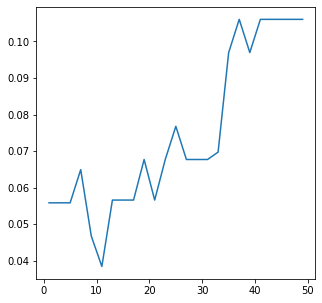

In [84]:
#mse=[1- for x in cv_score]
plt.figure(figsize=(5,5))
MSE = [1 - x for x in cv_score]
plt.plot(k_list, MSE)

plt.show()

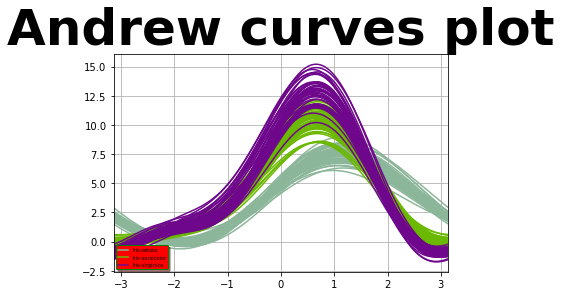

In [85]:
#from pandas.plotting import andrew_curves
pandas.plotting.andrews_curves
andrews_curves(iris,'Species')
plt.title('Andrew curves plot',fontsize=50,fontweight='bold')
plt.legend(loc=3,prop={'size':5},frameon=True,shadow=True,facecolor='red',edgecolor='green')

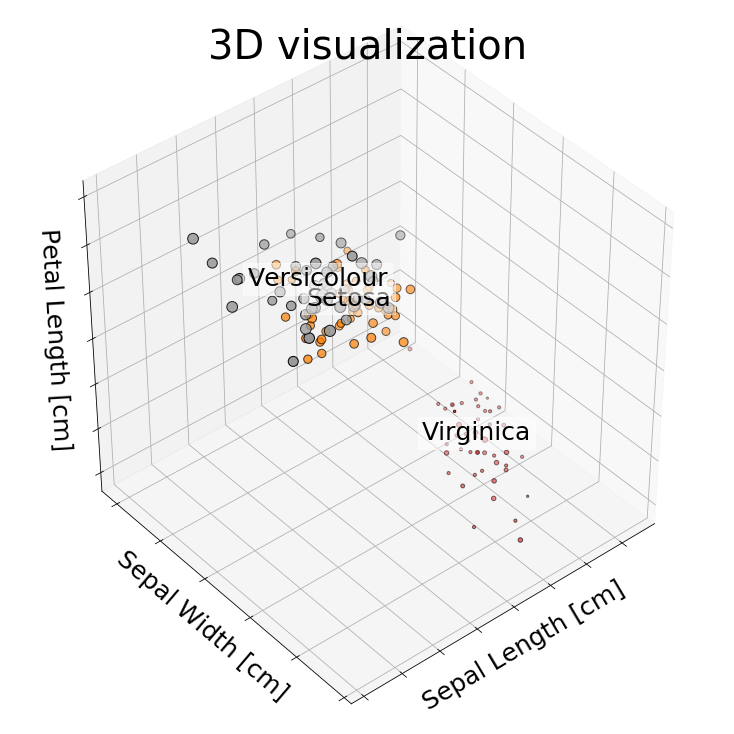

In [86]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(10,10))
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=40, azim=50)
ax.scatter(x[:,0],x[:,1],x[:,2],c=y,cmap=plt.cm.Set1,edgecolor='k',s = x[:, 3]*50)
for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(x[y == label, 0].mean(),
              x[y == label, 1].mean(),
              x[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [89]:
import  numpy as np
import pandas as  pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,
from sklearn.model_selection import cross_val_score

In [123]:
iris=pd.read_csv('iris.csv')
iris=iris.drop('Id',axis=1)
iris.shape
iris.groupby('Species').size()
x=iris.iloc[:,:4].values
y=iris.iloc[:,-1].values
#using label encoding to change the cateogorical data numbercal data
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
y=la.fit_transform(y)

In [139]:
#find the nearst neighbors
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
result=confusion_matrix(y_test,y_pred)
print(result)
score=accuracy_score(y_test,y_pred)*100
score


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


96.66666666666667

In [141]:
k_list=list(range(1,50,2))
cv_score=[]
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
scroes=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
cv_score.append(score.mean())
mse=[1-x for x in cv_score]

In [142]:
mse

[-95.66666666666667]

In [143]:
#using cross validation for parameter tuning
k_list=list(range(1,50,2))
#cross validatio scpre
cv_score=((1,50,2))
cv_score=[]

In [144]:
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cv_score.append(score.mean())

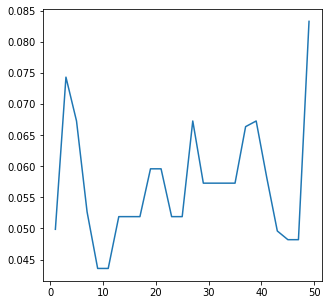

In [145]:
plt.figure(figsize=(5,5))
MSE = [1 - x for x in cv_score]
plt.plot(k_list, MSE)

plt.show()